# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Import Dataset

In [2]:
df=pd.read_csv('titanic_data.csv',index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop columns

In [4]:
df=df.drop(['Name','Ticket','Cabin'],axis=1)

# check null value

In [5]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
df.shape

(891, 8)

# check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


# Fill  and drop null values

In [8]:
df.fillna(df.mean(),inplace=True)
df.dropna(inplace=True)

# Find correlation

In [9]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


# Data Analysis

<BarContainer object of 889 artists>

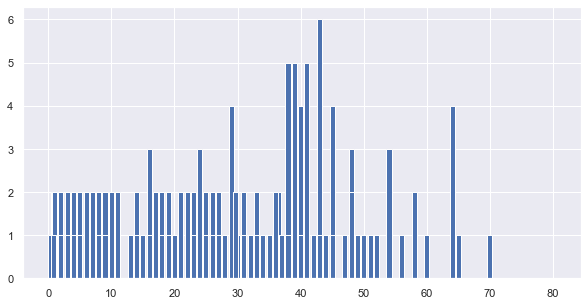

In [10]:
plt.figure(figsize=(10,5))
plt.bar(df['Age'],df['Parch'])

Survived
0    549
1    340
Name: Pclass, dtype: int64

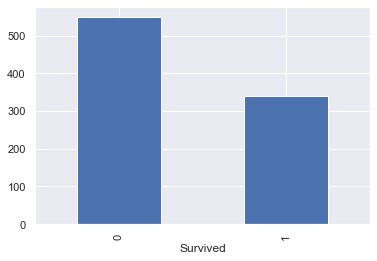

In [11]:
df.groupby('Survived')['Pclass'].count().plot(kind='bar')
df.groupby('Survived')['Pclass'].count()

Sex
female    312
male      577
Name: Survived, dtype: int64

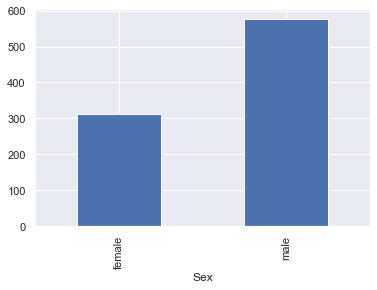

In [12]:
df.groupby('Sex')['Survived'].count().plot(kind='bar')
df.groupby('Sex')['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

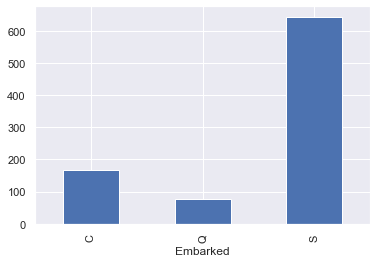

In [13]:
df.groupby('Embarked')['Survived'].count().plot(kind='bar')
df.groupby('Embarked')['Survived'].count()

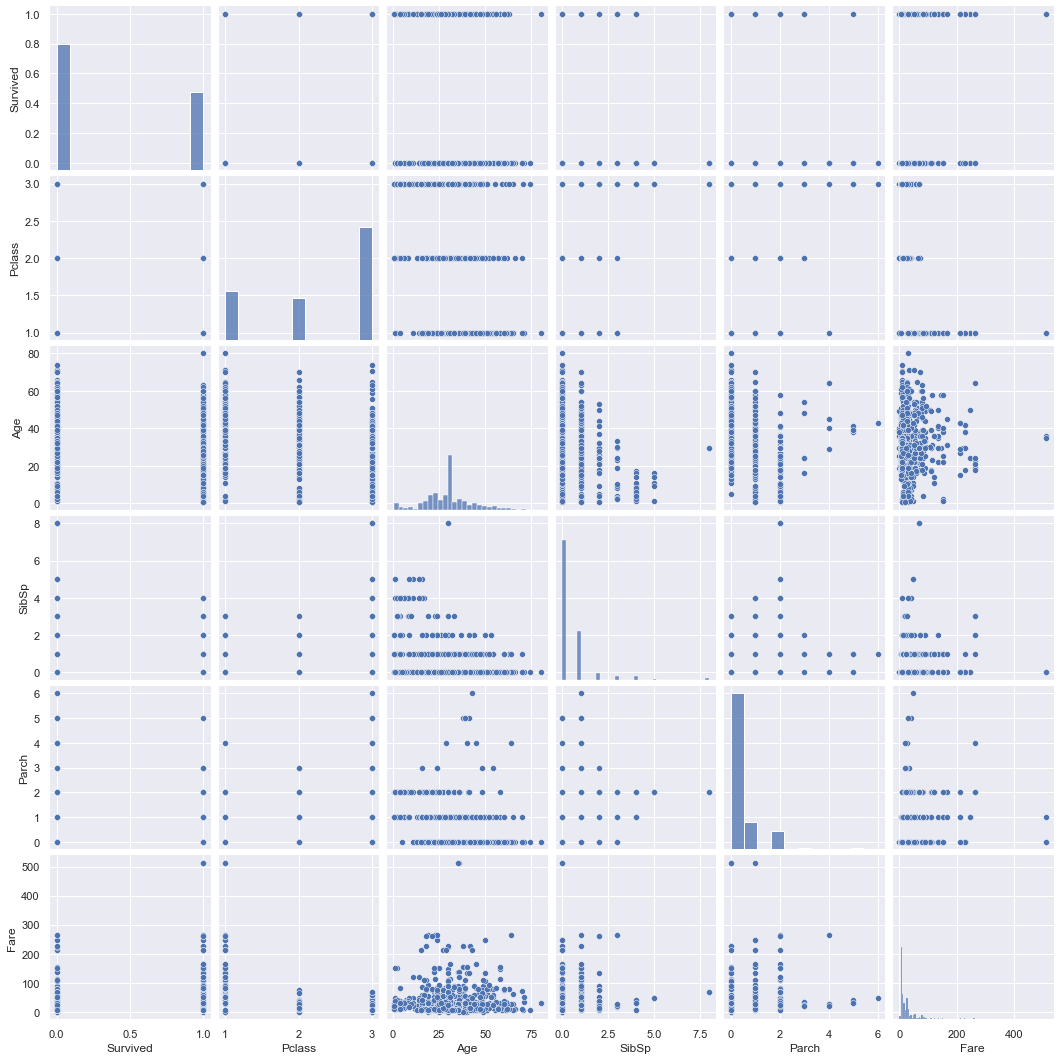

In [14]:
sns.pairplot(df)

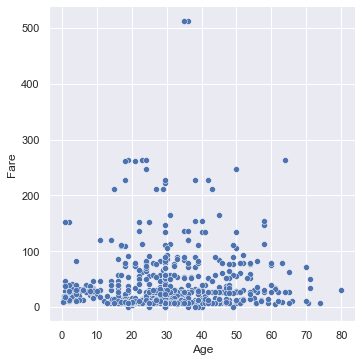

In [15]:
sns.relplot(x=df['Age'],y=df['Fare'])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

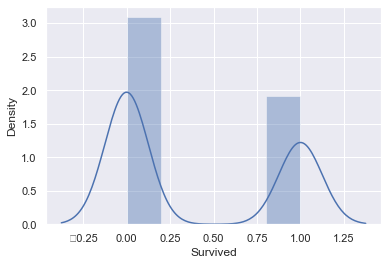

In [16]:
sns.distplot(df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

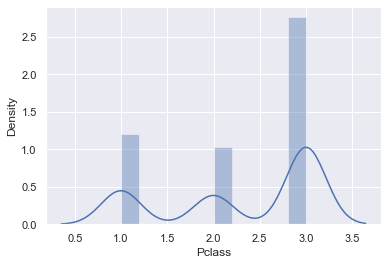

In [17]:
sns.distplot(df['Pclass'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

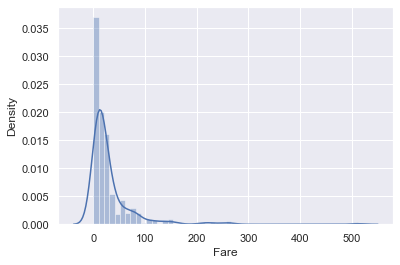

In [18]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

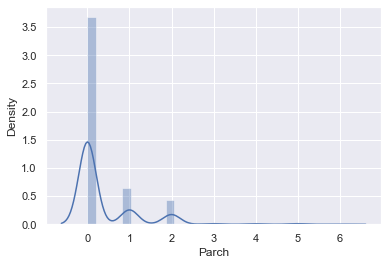

In [19]:
sns.distplot(df['Parch'])

In [20]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

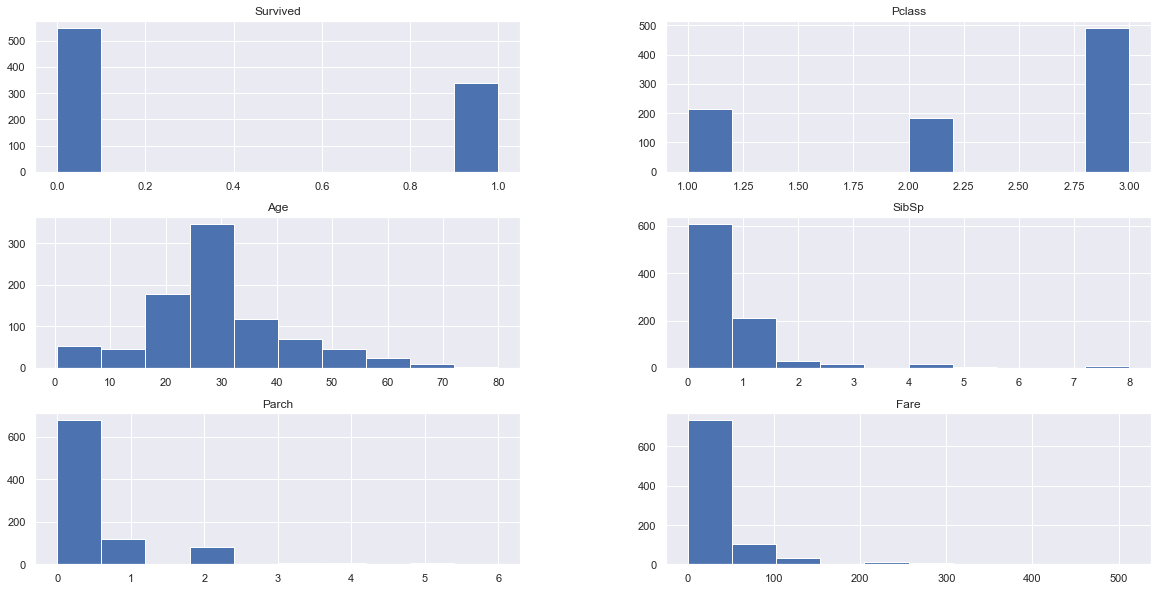

In [21]:

df.hist(figsize=(20,10))

<AxesSubplot:>

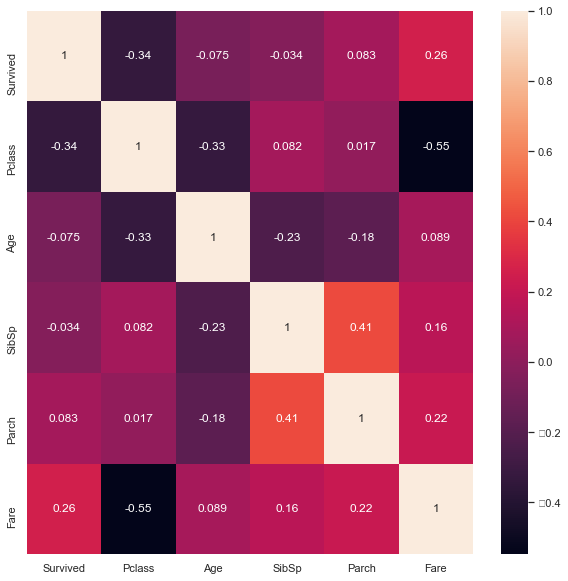

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# Label Encoding for categorical columns

In [23]:
from sklearn.preprocessing import LabelEncoder
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])
df['Sex']=LabelEncoder().fit_transform(df['Sex'])

# Make features and target variable

In [24]:
x=df.drop(['Survived'],axis=1)
y=df.Survived

# Split Dataset into train,test

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((711, 7), (178, 7), (711,), (178,))

# Apply algorithms

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

In [28]:
models={
    'logistic regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive_bayes':GaussianNB(),
    'svm':SVC(),
    'Gradient boosting ': GradientBoostingClassifier(),
    'XGB':XGBRFClassifier()
}

In [29]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name,model.score(x_test,y_test))

logistic regression 0.797752808988764
Decision Tree 0.7640449438202247
Random Forest 0.8146067415730337
KNN 0.7134831460674157
Naive_bayes 0.7696629213483146
svm 0.6797752808988764
Gradient boosting  0.8202247191011236
[08:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB 0.8258426966292135


# apply Kfold and cross_val_score technique

In [30]:
xgb=XGBRFClassifier()

In [31]:
from sklearn.model_selection import KFold,cross_val_score

In [32]:
kfold=KFold(5)
cross_val_score(xgb,x_train,y_train,cv=kfold)

[08:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.86713287, 0.78873239, 0.8028169 , 0.80985915, 0.87323944])

# Apply best algorithm

In [33]:
xgb=XGBRFClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)


[08:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8258426966292135

# Model evaluation

In [34]:
y_pred=xgb.predict(x_test)

In [35]:
y_probs=xgb.predict_proba(x_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        67

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178



In [37]:
from sklearn.metrics import plot_roc_curve

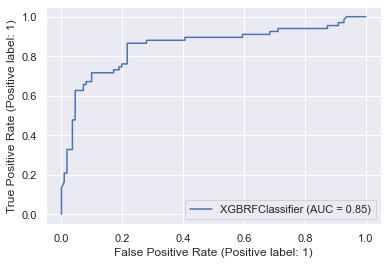

In [38]:
plot_roc_curve(xgb,x_test,y_test)

# Save model

In [39]:
import pickle
m1=open('titanic_data_analysis.pkl','wb')
pickle.dump(xgb,m1)